In [1]:
%matplotlib inline


GroupLasso for linear regression
================================

A sample script for group lasso regression


Setup
-----



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

from group_lasso import GroupLasso

np.random.seed(0)
GroupLasso.LOG_LOSSES = True

Set dataset parameters
----------------------



In [3]:
group_sizes = [np.random.randint(10, 20) for i in range(50)]
active_groups = [np.random.randint(2) for _ in group_sizes]
groups = np.concatenate(
    [size * [i] for i, size in enumerate(group_sizes)]
).reshape(-1, 1)
num_coeffs = sum(group_sizes)
num_datapoints = 10000
noise_std = 20

In [29]:
print(group_sizes)

[15, 10, 13, 13, 17, 19, 13, 15, 12, 14, 17, 16, 18, 18, 11, 16, 17, 17, 18, 11, 15, 19, 18, 19, 14, 13, 10, 13, 15, 10, 12, 13, 18, 11, 13, 13, 13, 17, 10, 11, 19, 19, 10, 14, 17, 13, 12, 17, 12, 10]


Generate data matrix
--------------------



In [4]:
X = np.random.standard_normal((num_datapoints, num_coeffs))

Generate coefficients
---------------------



In [13]:
w = np.concatenate(
    [
        np.random.standard_normal(group_size) * is_active
        for group_size, is_active in zip(group_sizes, active_groups)
    ]
)
w = w.reshape(-1, 1)
true_coefficient_mask = w != 0
intercept = 2

In [14]:
print(w.shape)

(720, 1)


Generate regression targets
---------------------------



In [6]:
y_true = X @ w + intercept
y = y_true + np.random.randn(*y_true.shape) * noise_std

View noisy data and compute maximum R^2
---------------------------------------



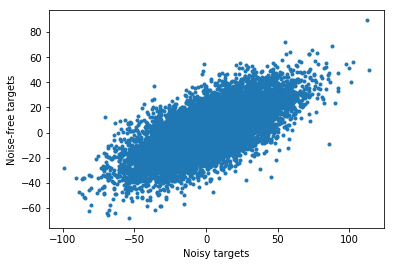

In [7]:
plt.figure()
plt.plot(y, y_true, ".")
plt.xlabel("Noisy targets")
plt.ylabel("Noise-free targets")
# Use noisy y as true because that is what we would have access
# to in a real-life setting.
R2_best = r2_score(y, y_true)

Generate estimator and train it
-------------------------------



In [8]:
gl = GroupLasso(
    groups=groups,
    group_reg=5,
    l1_reg=0,
    frobenius_lipschitz=True,
    scale_reg="inverse_group_size",
    subsampling_scheme=1,
    supress_warning=True,
    n_iter=1000,
    tol=1e-3,
)
gl.fit(X, y)

In [43]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.01)
clf.fit(X, y)
print(clf.coef_)

[-1.50210682e-01 -1.14750607e-01  3.27923400e-01 -2.17944418e-01
  1.31801809e-02 -4.30879421e-01  5.51380772e-02  2.94640004e-02
  7.78066555e-02  1.44204639e-01  2.45505254e-01 -1.67498598e-01
  1.48228810e-01 -1.98584365e-01  1.90373456e-01 -9.76983928e-03
 -1.50465234e-01 -7.53303288e-02 -9.01675417e-04  2.34968395e-01
  5.58296216e-02 -1.52171525e-01 -3.37095079e-01  5.99905728e-02
 -4.81955983e-02  6.58560515e-01  3.04485677e-01 -7.10058681e-01
 -5.59426122e-01  5.63262096e-02  1.37006524e+00  7.90711401e-02
  9.92325031e-01 -1.57075607e+00  2.62670448e-01 -1.15264361e-01
 -1.87448119e+00  8.94363007e-01 -3.63884708e-01  2.01006993e+00
 -3.08213262e-01  1.38086152e+00  2.68207893e-01  3.62415195e-01
 -1.73042236e+00 -8.34208039e-01 -1.48454655e+00 -2.56983092e-01
 -5.08153551e-01 -6.84902028e-01  3.41382185e-01 -1.77226806e-02
  1.00367422e-01 -2.21648537e-01 -5.70146215e-02  2.62394109e-01
  3.02177474e-01 -1.67038544e-03 -9.41610256e-02  8.71830680e-02
  7.52439480e-02 -3.54329

Extract results and compute performance metrics
-----------------------------------------------



In [9]:
# Extract info from estimator
yhat = gl.predict(X)
sparsity_mask = gl.sparsity_mask_
w_hat = gl.coef_

# Compute performance metrics
R2 = r2_score(y, yhat)

# Print results
print(f"Number variables: {len(sparsity_mask)}")
print(f"Number of chosen variables: {sparsity_mask.sum()}")
print(f"R^2: {R2}, best possible R^2 = {R2_best}")

Number variables: 720
Number of chosen variables: 313
R^2: 0.27127035561426716, best possible R^2 = 0.46262785225190173


In [39]:
print(gl.coef_)

[[-0.00000000e+00]
 [-0.00000000e+00]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [-0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [-0.00000000e+00]
 [-0.00000000e+00]
 [-0.00000000e+00]
 [ 6.95484089e-02]
 [ 2.81191276e-02]
 [-7.27655190e-02]
 [-4.70414108e-02]
 [ 1.05768066e-02]
 [ 1.12836066e-01]
 [-8.32061717e-03]
 [ 6.95439038e-02]
 [-1.34241561e-01]
 [ 1.08366923e-02]
 [-3.68679224e-02]
 [-1.61611066e-01]
 [ 8.78647248e-02]
 [-6.68821091e-02]
 [ 4.13251431e-01]
 [-9.67881253e-02]
 [ 3.08325344e-01]
 [ 5.19760240e-02]
 [ 1.18702222e-01]
 [-3.72585676e-01]
 [-1.48397244e-01]
 [-2.54223533e-01]
 [-5.49925289e-02]
 [-1.19588019e-01]
 [-1.14637333e-01]
 [ 4.91992247e-02]
 [ 0.00000000e+00]
 [ 0.0000000

Visualise regression coefficients
---------------------------------



X shape: (10000, 720)
True intercept: 2
Estimated intercept: [1.81098782]


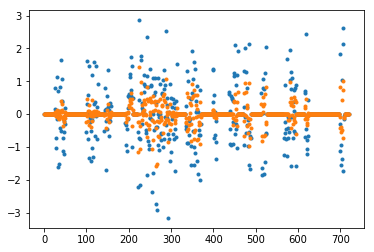

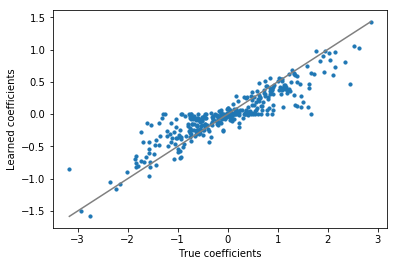

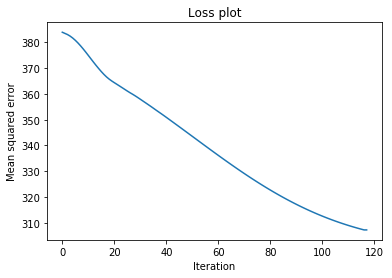

In [10]:
plt.figure()
plt.plot(w, ".", label="True weights")
plt.plot(w_hat, ".", label="Estimated weights")

plt.figure()
plt.plot([w.min(), w.max()], [w_hat.min(), w_hat.max()], "gray")
plt.scatter(w, w_hat, s=10)
plt.ylabel("Learned coefficients")
plt.xlabel("True coefficients")

plt.figure()
plt.plot(gl.losses_)
plt.title("Loss plot")
plt.ylabel("Mean squared error")
plt.xlabel("Iteration")

print("X shape: {X.shape}".format(X=X))
print("True intercept: {intercept}".format(intercept=intercept))
print("Estimated intercept: {intercept}".format(intercept=gl.intercept_))
plt.show()